<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/no_fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow
import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (9,655 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
!apt-get install -y tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
!apt-get install -y tesseract-ocr-training

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package tesseract-ocr-training


使用tesseract生成.box文件

In [4]:
!tesseract num3.font.exp0.tif num3.font.exp0 [-l eng -psm 6] batch.nochop makebox

read_params_file: Can't open [-l
read_params_file: Can't open eng
read_params_file: Can't open -psm
read_params_file: Can't open 6]
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1
Page 2
Page 3


In [ ]:
import cv2
img=cv2.imread('/content/車牌.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thr, binary = cv2.threshold(gray_img,127, 256, cv2.THRESH_BINARY)

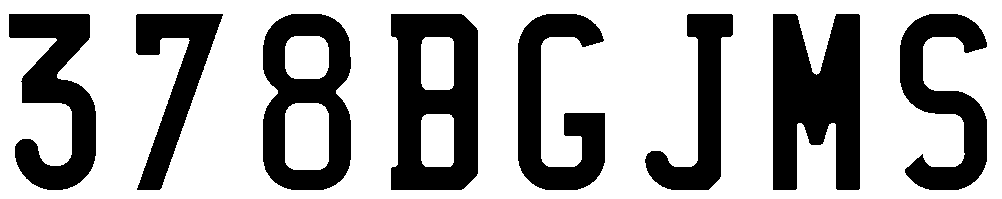

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(binary)

In [ ]:
cv2.imwrite('binary.tif',binary)

True

In [ ]:
text = pytesseract.image_to_string(binary)

In [ ]:
print(text)

In [ ]:

text = pytesseract.image_to_string('/content/binary.tif')
if len(text) ==1:
  print('辨識失敗')
else:
  clean_text = text.strip()#去除兩端不可見字符
  print('辨識結果:\n{}'.format(clean_text))

辨識失敗


使用echo命令創建字體特徵文件

In [5]:
!echo "num3 0 0 0 0 0" > font_properties

使用tesseract生成num.font.exp0.tr訓練文件

In [6]:
!tesseract num3.font.exp0.tif num3.font.exp0 [-l eng -psm 6] nobatch box.train

read_params_file: Can't open [-l
read_params_file: Can't open eng
read_params_file: Can't open -psm
read_params_file: Can't open 6]
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1
FAIL!
APPLY_BOXES: boxfile line 8/8 ((273,32),(323,132)): FAILURE! Couldn't find a matching blob
APPLY_BOXES:
   Boxes read from boxfile:      10
   Boxes failed resegmentation:       1
   Found 9 good blobs.
Generated training data for 2 words
Page 2
row xheight=48.5, but median xheight = 66.375
FAIL!
APPLY_BOXES: boxfile line 2/b ((150,546),(201,645)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 4/D ((384,547),(433,645)): FAILURE! Couldn't find a matching blob
APPLY_BOXES: boxfile line 7/G ((132,368),(184,481)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 11/J ((440,331),(544,485)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 15/N ((353,169),(448,310)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: box

生成字符集文件


In [8]:
!unicharset_extractor num3.font.exp0.box

Extracting unicharset from box file num3.font.exp0.box
Other case a of A is not in unicharset
Other case B of b is not in unicharset
Other case c of C is not in unicharset
Other case d of D is not in unicharset
Other case e of E is not in unicharset
Other case f of F is not in unicharset
Other case g of G is not in unicharset
Other case h of H is not in unicharset
Other case j of J is not in unicharset
Other case l of L is not in unicharset
Other case n of N is not in unicharset
Other case p of P is not in unicharset
Other case r of R is not in unicharset
Other case s of S is not in unicharset
Other case t of T is not in unicharset
Other case u of U is not in unicharset
Other case v of V is not in unicharset
Other case x of X is not in unicharset
Other case y of Y is not in unicharset
Wrote unicharset file unicharset


生成數據字典

In [9]:
!mftraining -F font_properties -U unicharset -O num3.unicharset num3.font.exp0.tr

Reading num3.font.exp0.tr ...
Flat shape table summary: Number of shapes = 21 max unichars = 1 number with multiple unichars = 0
Done!


In [10]:
!cntraining num3.font.exp0.tr

Reading num3.font.exp0.tr ...
Clustering ...

Writing normproto ...


手動修改檔名inttemp,normproto,pffmtable,shapetable
前加上檔名

合併數據文件，生成字庫文件

In [11]:
!combine_tessdata num3.

Combining tessdata files
Output num3.traineddata created successfully.
Version string:4.1.1
1:unicharset:size=1990, offset=192
3:inttemp:size=273838, offset=2182
4:pffmtable:size=278, offset=276020
5:normproto:size=2702, offset=276298
13:shapetable:size=382, offset=279000
23:version:size=5, offset=279382


In [12]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
# 创建一个目录用于存放训练数据
!mkdir -p /content/tessdata/

# 将自定义训练数据复制到指定目录
!cp /content/num.traineddata /content/tessdata/

In [ ]:
#设置 TESSDATA_PREFIX 环境变量
!export TESSDATA_PREFIX="/content/tessdata/"